In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Jyoti\Downloads\Steel_industry_data.csv")


In [3]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df.iloc[:,8] = label_encoder.fit_transform(df.iloc[:,8])
df.iloc[:,9] = label_encoder.fit_transform(df.iloc[:,9])
df.iloc[:,10] = label_encoder.fit_transform(df.iloc[:,10])

In [5]:
### split dataset into independent and dependent features
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x=df.iloc[:,1:]

In [6]:
x

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,3.17,2.95,0.00,0.0,73.21,100.00,900,0,1,0
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,1,0
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,1,0
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,1,0
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,1,0
...,...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,0,1,0
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1,0
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1,0
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,1,0


In [7]:
y

0        0
1        0
2        0
3        0
4        0
        ..
35035    0
35036    0
35037    0
35038    0
35039    0
Name: Load_Type, Length: 35040, dtype: int32

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [9]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9648148148148148

In [10]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5259259259259259

In [11]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.975925925925926

In [12]:
from sklearn.model_selection import cross_val_score
#Set LogisticRegression, CV =3

score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target,cv=3)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.89482471 0.95325543 0.90984975]
Avg : 0.9193099610461881


In [13]:
#Set SVM and CV=3

score_svm =cross_val_score(SVC(gamma='auto'), digits.data, digits.target,cv=3)
print(score_svm)
print("Avg :",np.average(score_svm))

[0.38063439 0.41068447 0.51252087]
Avg : 0.4346132442960489


In [14]:
#Set Random Forest and CV=3

score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target,cv=3)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.93155259 0.95993322 0.9148581 ]
Avg : 0.9354479688369505


In [15]:
#Parameter Tuning Using K-Fold

In [16]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=5 and CV=10 :",np.average(scores1))

Avg Score for Estimators=5 and CV=10 : 0.8798230912476722


In [17]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=20 and CV=10 :",np.average(scores2))

Avg Score for Estimators=20 and CV=10 : 0.927088764742396


In [18]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),digits.data, digits.target, cv=10)
print("Avg Score for Estimators=30 and CV=10 :",np.average(scores3))

Avg Score for Estimators=30 and CV=10 : 0.9432371198013655


In [19]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),digits.data, digits.target, cv=10)

print("Avg Score for Estimators=40 and CV=10 :",np.average(scores4))

Avg Score for Estimators=40 and CV=10 : 0.9465735567970205


In [22]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [24]:
model = KNeighborsClassifier(n_neighbors=5) 

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
print(scores.mean())

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.8826198630136985


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [25]:
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

C:\Users\sahil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\sahil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[0.8845319634703197, 0.8856164383561644, 0.8826198630136985, 0.8833333333333334, 0.8826198630136985, 0.8820776255707763, 0.8808219178082192, 0.880593607305936, 0.8790810502283104, 0.8793664383561645, 0.8777397260273974, 0.8760559360730594, 0.875428082191781, 0.8757420091324202, 0.8742009132420092, 0.8738584474885845, 0.8731164383561643, 0.8736015981735159, 0.8720890410958904, 0.8717751141552512, 0.8713470319634704, 0.8704623287671233, 0.8703767123287671, 0.8691780821917808]


C:\Users\sahil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Text(0, 0.5, 'Cross-Validated-Accuracy')

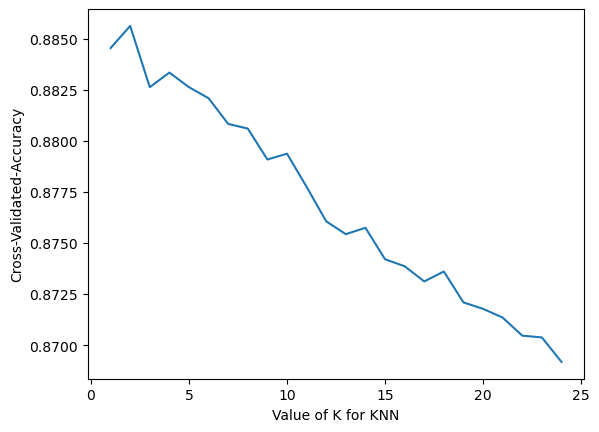

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated-Accuracy')